# Introduction: Crypoasset Analysis 
     By: Derek Lorenzen  
     For: Digital Assets Data  
     Jr. Data Scientist Position  

### About Me
I have always been interested in finance and cryptocurrencies but I am not a quantitative analyst by trade; I am a mechanical engineer with a degree in economics. Seeking to grow my programming skills and data science literacy, I recently completed the Galvanize Data Science Immersive. The program takes place over 3 months and opens for investigation all aspects of data science. Naturally, I focused on artificial intelligence and it's place in finance. I believe both this experience in coordination with a well honed scientific analysis background complement my desire to understand the cryptoasset market and make me a hard working, enthusiastic applicant to the Digital Assets Data team. 
    
### Motivation
The integration of blockchain based digital value stores into the classical finance world is perpetually making waves. As investors look to trade the cryptoasset space, they will be in need of visualizations and metrics. To this end, I will employ a JavaScript based visualization package, Altair, and program in the most commonly seen classical finance indicators to evaluate their use in cryptoasset trading.  
It is my contention that due to the fundamentally different nature of blockchain as a store of value, the data are ripe for exploration. I have chosen a very limited project due to time and ability constraints, though we must be aware of the sheer size of areas to explore...

### Implications and Future Work
To my knowledge, cryptoassets are indeed traded like assets in the stock and foreign exchange markets though this is one of the few similarities between the spaces. Some key differences to note are:
1. Cryptoassets store value but are not backed by tangible goods, revenue streams, or countries. 
3. Regulation has not caught up to the market so insider/outsider effects may be magnified.
4. (The Big One) Price Effects: Markets remain open, no splits or dividends occur, money supply changes by asset, money market forces are complicated by miners, transaction stream, and highly varying demand. 

In addition to these known differences, I also include the idea of technological differences as both a barrier to entry for traders and a non-trivial implicit value.
1. Entry level traders are unfamiliar with the process of trading cryptoassets and likely the technology…
2. Cryptoassets may be similar to stocks in that cryptoasset “fundamentals” exist by means of the use, novelty, and technological design of the asset yet these data remain obscured without a hefty comprehension of the technology. 

In reality, one could spend months investigating any one of the above differences. Because of this, I will limit my scope to finding new periods for the commonly used crossover moving average trading strategy and conveying my findings in Altair. 

### Concept Review
In this notebook, I will explore a data set containing market data for 11 cryptoassets as requested by the Digital Assets Data team.  
Focusing on the learning and use of visualization package, Altair, I begin by adding in some of the more classical indicators. 
1. Industry Baseline
    * SMA - The Simple Moving Average
2. Industry Favorite
    * EMA - The Exponential Moving Average
3. Industry Valuation Metric
    * RSI - Relative Strength Index
    
Honing in on the Exponential Moving Average, I evaluate its use in the cryptoasset space by running two lightweight procedures: 
1. Trade Execution on Crossover
    * Traders often use a pair of moving averages to signal a change in market direction. There are two crossovers in the valuation sense of moving average strategies, crossovers where the short-term signal passes down through the long-term signal (Sell) and the compliment; the short-term signal rises through the long-term signal (Buy). 
2. Deviation From Classical Finance Period Baselines
    * Utilizing the golden ratio as the inspiration for a type of grid search, many periods are tested for the exponential moving average.  
    
TODO: From the outcomes of the above procedures, I will recommed a period pair for each of the 11 assets in the data. 

# Setup
The Packages for this project are:
> Pandas  
NumPy  
Altair

In [1]:
# Making Changes to Altair Theme
def calm_theme():
    mark_color = '#222d35'
    return {'config': {
                        'view': {
                            'height': 400,
                            'width': 400
                        },
                        'title': {
                            'fontSize': 16,
                            'anchor': 'end'
                        },
                        'axis': {
                            'labelFontSize': 12,
                            'titleFontSize': 14
                        },
                        'legend': {
                            'labelFontSize': 12,
                            'titleFontSize': 14

                        },
                    }
            }

    (^ Altair Setup){This notebook has some collapsed cells}

In [10]:
# Imports
import sys
sys.path.append('./src')
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *
from Indicators import Indicators

# MPL Setup
%matplotlib inline  
plt.style.use('ggplot')

# Altair Setup
alt.renderers.enable('notebook')
alt.themes.register('calm_theme', calm_theme)
alt.themes.enable('calm_theme')

# Pandas Setup
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

    (^ Imports){To expand, select cell then click the [^] arrow in toolbar}

## Data Overview

In [3]:
# Data Sources
blockchain = pd.read_csv('data/blockchain_data.csv')
market = pd.read_csv('data/market_data.csv')

In [4]:
print('Blockchain Data Shape: ', blockchain.shape)
blockchain.head(10)

Blockchain Data Shape:  (2075, 23)


,asset_id,epoch_ts,volume_sum,volume_high,volume_low,volume_mean_q,volume_mean_a,volume_mean_g,volume_mean_h,volume_std,coinbase_volume,txn_count,fee_sum,fee_high,fee_low,fee_mean_q,fee_mean_a,fee_mean_g,fee_mean_h,fee_std,block_reward_sum,supply_total,blockchain_size
0,Bitcoin_BTC_BTC,2019-02-19 00:00:00+00,1.780234e+06,11837.005536,0.000000,74.281965,5.112060,0.054446,1.404571e-03,74.105958,1986.592950,348242,36.592950,0.055191,0.0,0.000445,0.000105,0.000039,0.000016,0.000433,1950.000000,1.754774e+07,193912854133
1,Dash_DASH_DASH,2019-02-19 00:00:00+00,3.388989e+05,12879.641105,0.000000,324.575946,23.654558,0.173700,3.251968e-03,323.724144,1852.955010,14327,2.839200,0.037780,0.0,0.001894,0.000206,0.000009,0.000007,0.001883,1850.115799,8.310922e+06,8295434127
2,Ethereum_ETH_ETH,2019-02-19 00:00:00+00,2.787835e+06,28467.000000,0.000000,137.359364,5.180472,0.223269,8.359763e-15,137.261767,13536.031250,538143,2387.291689,0.160157,0.0,0.012248,0.004436,0.001707,0.001073,0.011416,13536.031250,3.327931e+07,73831306948
3,Litecoin_LTC_LTC,2019-02-19 00:00:00+00,4.954276e+06,81336.280258,0.000005,2483.321168,187.243515,2.332579,2.150916e-02,2476.298780,15142.664114,26459,17.664114,0.100000,0.0,0.003460,0.000683,0.000154,0.000027,0.003392,15125.000000,6.056878e+07,18246202449
4,Zcash_ZEC_ZEC,2019-02-19 00:00:00+00,2.372777e+06,78641.216993,0.000000,5599.490387,611.540576,4.954945,2.860419e-02,5566.713338,7251.090570,3880,1.090570,0.071174,0.0,0.002287,0.000330,0.000062,0.000015,0.002263,7250.000000,5.931475e+06,18321777658
5,Bitcoin_BTC_BTC,2019-02-18 00:00:00+00,1.187294e+06,4346.670682,0.000000,34.616319,3.448690,0.049894,1.547531e-03,34.444151,1966.904101,344274,29.404101,0.112050,0.0,0.000599,0.000085,0.000027,0.000012,0.000593,1937.500000,1.754579e+07,193786067976
6,Dash_DASH_DASH,2019-02-18 00:00:00+00,2.891833e+05,13070.331976,0.000000,260.312988,21.524625,0.187790,2.578225e-03,259.431209,1822.776412,13435,2.770986,0.067380,0.0,0.001918,0.000215,0.000009,0.000006,0.001906,1820.005415,8.309072e+06,8281540377
7,Ethereum_ETH_ETH,2019-02-18 00:00:00+00,3.021452e+06,70844.148693,0.000000,194.316456,5.845082,0.239747,7.168515e-15,194.228713,13307.843750,516922,2467.652294,0.160001,0.0,0.012970,0.004774,0.001741,0.001045,0.012060,13307.843750,3.326577e+07,73725904942
8,Litecoin_LTC_LTC,2019-02-18 00:00:00+00,4.330423e+06,175200.879259,0.000005,2281.302351,162.042472,2.456053,2.594263e-02,2275.582655,15119.184938,26724,19.184938,0.168516,0.0,0.003756,0.000734,0.000186,0.000042,0.003684,15100.000000,6.055365e+07,18231051077
9,Zcash_ZEC_ZEC,2019-02-18 00:00:00+00,1.351855e+06,72248.204216,0.000000,3387.004141,351.679356,6.547745,2.051670e-02,3369.135143,7188.524393,3844,1.024393,0.040198,0.0,0.001911,0.000313,0.000060,0.000006,0.001885,7187.500000,5.924225e+06,18314844261


In [5]:
print('Market Data Shape: ', market.shape)
market.head(10)

Market Data Shape:  (4563, 17)


,base_asset_id,quote_asset_id,epoch_ts,price_open,price_high,price_low,price_close,price_mean_a,price_std,price_vwap_a,price_vwap_h,cnt_total,volume_total,volume_high,volume_low,volume_mean_a,volume_std
0,Bitcoin_BTC_BTC,USDollar_USD_USD,2019-02-19 00:00:00+00,3932.714647,4093.592472,3841.540000,3947.838332,3982.976819,42.843054,3992.851593,3992.331372,505918,1.016199e+05,3.309573e+02,1.800000e-09,0.245708,1.312071
1,Cardano_ADA_ADA,USDollar_USD_USD,2019-02-19 00:00:00+00,0.046611,0.051831,0.044664,0.046850,0.047804,0.000686,0.047779,0.047767,89496,4.697049e+08,1.680672e+06,1.000000e-01,6162.362937,18885.346700
2,Dash_DASH_DASH,USDollar_USD_USD,2019-02-19 00:00:00+00,87.616371,91.952000,85.849339,88.389405,88.486393,0.926142,88.470100,88.459994,23643,3.341039e+04,2.255077e+02,1.000000e-08,1.737967,5.353673
3,EOS_EOS_EOS,USDollar_USD_USD,2019-02-19 00:00:00+00,3.550629,4.077906,3.401717,3.596504,3.677321,0.061916,3.678656,3.677503,378772,4.808927e+07,3.771251e+04,1.000000e-08,187.935652,547.250706
4,Ethereum_ETH_ETH,USDollar_USD_USD,2019-02-19 00:00:00+00,148.700401,154.305449,141.927303,145.123666,148.814893,1.650709,149.044636,149.023308,578049,1.743712e+06,2.000000e+03,1.000000e-08,4.172325,15.892995
5,Litecoin_LTC_LTC,USDollar_USD_USD,2019-02-19 00:00:00+00,48.192801,61.517811,36.169266,48.046467,48.366702,0.656276,48.407775,48.396480,194864,1.296146e+06,1.792219e+03,1.000000e-08,8.902979,29.462538
6,NEO_NEO_NEO,USDollar_USD_USD,2019-02-19 00:00:00+00,8.963390,9.867577,8.538050,9.061386,9.143871,0.131962,9.145463,9.143403,82431,2.435887e+06,5.458066e+03,3.000000e-08,36.245576,92.092298
7,Ripple_XRP_XRP,USDollar_USD_USD,2019-02-19 00:00:00+00,0.328831,0.372683,0.313581,0.328842,0.338636,0.006919,0.338941,0.338790,432190,4.141837e+08,3.381149e+05,1.000000e-08,1068.058289,3257.453203
8,Stellar_XLM_XLM,USDollar_USD_USD,2019-02-19 00:00:00+00,0.085477,0.100649,0.083569,0.091535,0.090382,0.002859,0.090494,0.090406,160011,3.557663e+08,1.036664e+06,1.000000e-08,2432.634571,8965.081910
9,TRON_TRX_TRX,USDollar_USD_USD,2019-02-19 00:00:00+00,0.025494,0.027993,0.023796,0.025319,0.025796,0.000342,0.025801,0.025795,95849,1.114902e+09,3.145976e+06,1.000000e-08,12400.157059,35206.629752


## Data Preparation

In [6]:
%run -i make_df.py

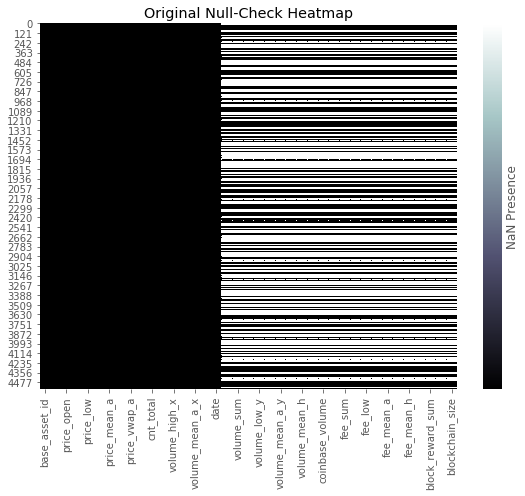

In [13]:
# In-Notebook Example of Nulls for Basic Outer Join
# Outer Join
composite_test = market.merge(blockchain, how='outer', left_on=['base_asset_id', 'date'], right_on=['asset_id','date'])
# Nulls heatmap
fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(composite_test.isnull(), 
            cmap='bone', 
            vmin=0, vmax=1, 
            ax=ax, 
            cbar_kws={'ticks':[], 'label':'NaN Presence'})
ax.set_title('Original Null-Check Heatmap')
fig.tight_layout()

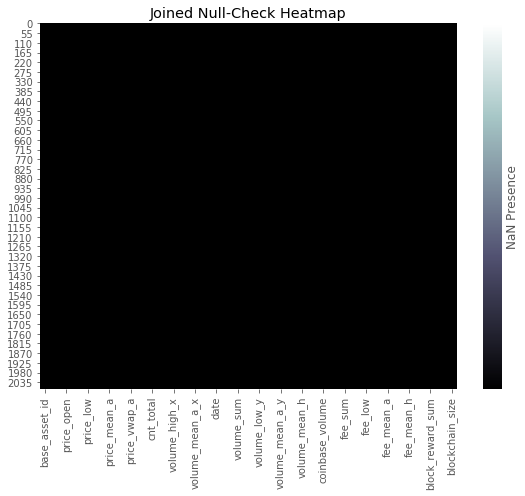

In [14]:
# Plot of Date Preserving Asset Join
fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(composite.isnull(),
            cmap='bone',
            vmin=0, vmax=1,
            ax=ax,
            cbar_kws={'ticks':[], 'label':'NaN Presence'})
ax.set_title('Joined Null-Check Heatmap')
fig.tight_layout()

In [15]:
periods = {
    'sma':5,
    'sma_long':8,
    'ema':13,
    'ema_long':21,
    'wilder_rsi':14
    # all hail the fib sequence
    }
# Indicators Class
composite = Indicators(composite, periods).add_indicators()

In [17]:
composite.head(20)

,base_asset_id,quote_asset_id,price_open,price_high,price_low,price_close,price_mean_a,price_std,price_vwap_a,price_vwap_h,cnt_total,volume_total,volume_high_x,volume_low_x,volume_mean_a_x,volume_std_x,date,asset_id,volume_sum,volume_high_y,volume_low_y,volume_mean_q,volume_mean_a_y,volume_mean_g,volume_mean_h,volume_std_y,coinbase_volume,txn_count,fee_sum,fee_high,fee_low,fee_mean_q,fee_mean_a,fee_mean_g,fee_mean_h,fee_std,block_reward_sum,supply_total,blockchain_size,sma_s,sma_l,ema_s,ema_l,change,wilder_rsi
0,Zcash_ZEC_ZEC,USDollar_USD_USD,463.890400,553.000000,444.756253,506.244289,502.605471,23.005950,505.683692,504.680090,45296,6.606240e+04,518.371249,1.000000e-06,1.598720,5.786044,2018-01-01,Zcash_ZEC_ZEC,4.169595e+05,12626.510102,0.000000,461.194881,41.463757,0.772053,1.255734e-02,459.350039,7180.098031,10056,5.098031,0.035320,0.0,0.001697,0.000538,0.000120,0.000014,0.001610,7175.000000,2.965038e+06,8821091445,NaN,NaN,506.244289,506.244289,NaN,0.000000
1,Bitcoin_BTC_BTC,USDollar_USD_USD,13584.684868,13893.000000,7174.957499,13126.453533,13113.583418,227.090090,13078.443537,13073.950379,445897,6.528863e+04,96.943938,1.000000e-08,0.163340,0.584941,2018-01-01,Bitcoin_BTC_BTC,1.683245e+06,13905.132526,0.000000,74.562225,6.962548,0.132191,3.210213e-03,74.236589,2419.413036,241757,469.413036,0.481224,0.0,0.011544,0.001943,0.000856,0.000446,0.011379,1950.000000,1.677641e+07,149067921759,NaN,NaN,13126.453533,13126.453533,NaN,0.000000
2,Dash_DASH_DASH,USDollar_USD_USD,970.857188,1039.337343,936.854673,993.122740,984.943897,15.426370,984.581466,984.333977,43341,3.436700e+04,149.178920,1.000000e-08,0.861954,2.561028,2018-01-01,Dash_DASH_DASH,7.782686e+04,2198.799900,0.000108,53.196173,8.679252,0.680871,2.915233e-02,52.486289,1980.644320,8967,6.226673,0.200000,0.0,0.005904,0.000740,0.000044,0.000008,0.005858,1974.417641,7.540124e+06,4037612930,NaN,NaN,993.122740,993.122740,NaN,0.000000
3,Litecoin_LTC_LTC,USDollar_USD_USD,219.098218,233.080000,158.043587,219.364528,219.476290,3.146675,219.456901,219.405598,288516,9.634599e+05,2205.772064,1.000000e-08,3.727347,12.869952,2018-01-01,Litecoin_LTC_LTC,8.597006e+06,99999.999540,0.000600,979.796526,102.805487,5.681885,1.532717e-01,974.393975,13858.744685,83624,158.744685,0.308655,0.0,0.005582,0.001911,0.000963,0.000257,0.005245,13700.000000,5.457580e+07,9919946632,NaN,NaN,219.364528,219.364528,NaN,0.000000
4,Ethereum_ETH_ETH,USDollar_USD_USD,713.091791,764.970000,525.336882,741.769308,730.550411,11.058564,730.086219,729.905038,659837,7.134015e+05,4278.328490,1.000000e-08,1.302073,7.151242,2018-01-01,Ethereum_ETH_ETH,8.274074e+06,53796.373795,0.000000,85.700387,9.032200,0.526299,3.610404e-14,85.223140,20946.906250,916064,2091.326831,0.152149,0.0,0.005118,0.002283,0.001248,0.000854,0.004580,20946.906250,2.495968e+07,21936094456,NaN,NaN,741.769308,741.769308,NaN,0.000000
9,Zcash_ZEC_ZEC,USDollar_USD_USD,522.371969,579.797905,464.982202,527.459843,539.249792,19.389608,536.709799,535.713057,49021,6.630873e+04,668.052677,1.000000e-06,1.535176,7.222932,2018-01-02,Zcash_ZEC_ZEC,3.705661e+06,32999.999899,0.000000,2259.072208,297.023194,0.960036,7.018702e-03,2239.550509,7054.732530,12476,4.732530,0.024818,0.0,0.001286,0.000397,0.000117,0.000012,0.001223,7050.000000,2.972088e+06,8856598701,NaN,NaN,509.275082,508.172975,21.215555,0.000000
7,Ethereum_ETH_ETH,USDollar_USD_USD,758.912327,1072.940619,551.037344,834.122612,837.955900,30.380286,836.187925,834.876335,1304633,1.801561e+06,3992.662669,1.000000e-08,1.866086,8.962483,2018-01-02,Ethereum_ETH_ETH,1.401454e+07,68000.000000,0.000000,145.656777,12.070306,0.759167,2.183306e-14,145.155856,20942.187500,1161076,2349.538406,0.159682,0.0,0.004928,0.002024,0.001120,0.000779,0.004494,20942.187500,2.498062e+07,22109499309,NaN,NaN,754.962637,750.165063,92.353305,0.000000
8,Litecoin_LTC_LTC,USDollar_USD_USD,224.531802,262.000000,163.427386,243.091132,242.975705,7.800299,243.113180,242.860652,586914,2.150258e+06,1891.690000,1.000000e-08,4.199300,16.515316,2018-

## Exploratory Data Analysis

In [ ]:
cols = ['price_close', 'cnt_total', 'volume_total']
alt.Chart(composite[composite['base_asset_id'] == 'Bitcoin_BTC_BTC']).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='base_asset_id:N'
).properties(
    width=150,
    height=150,
).repeat(
    row=cols,
    column=cols[::-1]
).interactive()

In [ ]:
asset_sample = composite.groupby('base_asset_id').apply(lambda x: x.sample(100)).reset_index(drop=True)
alt.Chart(asset_sample).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='base_asset_id:N'
).properties(
    width=150,
    height=150,
).repeat(
    row=cols,
    column=cols[::-1]
).interactive()

## Concept Review

# Indicators

## Industry Favorites (Are they possible in Altair?)

#### RSI: Relative Strength Index.
This indicator is very commonly used to show momentum in traditional stock price. Most RSI's calculated professionally contain the Wilder Smoothing Factor as suggested in the white paper.  
Formula:  
"Index" - $100 - 100/(1 + RS)$  
"Relative Strength" - $ Average Gain / Average Loss $  
"Average Gain/Loss" - EMA Using $Alpha = 1/N$ for Smoothing

#### SMA: Simple Moving Average
This is an indicator performing directly on the price variable of interest. It "simply" averages the observed values within a given window as the window slides through the data. Thus...it is a moving average filter.   
Formula:  
SMA: $(P_1 + P_2 ... P_N)/N$

#### EMA: Exponential Moving Average
The exponential moving average is an industry favorite due to it's hyperparameter adjustability. Most tend to engineer the formula to weight recent values with a specific importance metric called the weight or smoothing factor. For finance, this is $2/(N+1)$.  

Formula:  
$(Price - EMA_{prev})*factor + EMA_{prev}$  
The calculation is rolling but starts with the SMA to get an initial value calculated above. 

Aside: 
The astute may wonder how and why the above is an "exponential"...   
Recall the taylor series expansion of $e^{mx} = 1 + mx + (mx)^2/{2!}...$
This is a more general form of what's known as a geometric series.   
As an approximator, typically the first term is the most drastic/closest mover, the following just slowly hone in on the true value. As such, the first term is the most important. If the variable of interest is recent observations, a geometric progression captures recent moves quickly. 
This geometric relationship describes the nuance of "weighting recent changes more heavily"

### RSI (Bitcoin)

In [ ]:
# Prepare
bitcoin = composite[composite['base_asset_id'] == 'Bitcoin_BTC_BTC']
thresholds = pd.DataFrame([{'low': 30,'high': 70,'mid': 50}])
min_date = str(min(bitcoin['date']).month) + '/' + str(min(bitcoin['date']).year)
max_date = str(max(bitcoin['date']).month) + '/' + str(max(bitcoin['date']).year)
# Plot
price = alt.Chart(bitcoin).mark_trail().encode(
        x=alt.X('date:T', title=None),
        y=alt.Y('price_mean_a:Q', axis=alt.Axis(title='Arithmetic Mean Price')), # another way
        size='volume_total:Q'
    ).properties(
        width=800,
        height=400
)
rsi_base = alt.Chart(bitcoin).mark_line(
        color='#870606',
        size=2
    ).encode(
        x=alt.X('date:T', title = 'Date - {}:{}'.format(min_date, max_date)),
        y=alt.Y('wilder_rsi:Q', title='Wilder RSI')
    ).properties(
        width=800,
        height=100
)
low_rsi = alt.Chart(thresholds).mark_rule(
        color='#000000',
        size=1.25, 
    ).encode(
        y=alt.Y('low:Q', title=None)
)
high_rsi = alt.Chart(thresholds).mark_rule(
        color='#000000',
        size=1.25
    ).encode(
        y=alt.Y('high:Q', title=None)
)

rsi = rsi_base + low_rsi + high_rsi

price & rsi

### SMA (Bitcoin)

In [ ]:
plot_ind(bitcoin, 'sma_s', 'sma_l')

### EMA (Across Asset)

In [ ]:
symbols = composite['base_asset_id'].astype('category').cat.categories
plots = alt.vconcat()
for asset in symbols:
    plots &= plot_ind(composite[composite['base_asset_id'] == asset], 'ema_s', 'ema_l')
plots

### Trade Simulations (Bitcoin)

## Testing

In [ ]:
record = trade_sim(bitcoin, 'price_ema_13day', 'price_ema_21day', 'price_close', 'base_asset_id')
plot_ema_trade(bitcoin, record)

In [ ]:
sequence = [[i, i*1.618] for i in range(1,21)]
ema_testing = market[['base_asset_id', 'price_close', 'date']].copy()
ema_record = pd.DataFrame(columns=['index', 'date', 'trade', 'price', 'profit', 'asset', 'pair'])
for pair in sequence:
    period_short, period_long = pair
    # Exponential moving average
    ema_testing['price_ema_short'.format(period_short)] = (ema_testing.groupby('base_asset_id')
                                                        .apply(lambda x: x['price_close']
                                                        .ewm(span=period_short, 
                                                             adjust=False).mean())
                                                        .reset_index(level=0, drop=True))
    # Long exponential moving average
    ema_testing['price_ema_long'.format(period_long)] = (ema_testing.groupby('base_asset_id')
                                                             .apply(lambda x: x['price_close']
                                                             .ewm(span=period_long, 
                                                                  adjust=False).mean())
                                                             .reset_index(level=0, drop=True))
    bitcoin_testing = ema_testing[ema_testing['base_asset_id'] == 'Bitcoin_BTC_BTC']
    this_record = trade_sim(bitcoin_testing, 'price_ema_short', 'price_ema_long', 'price_close', 'base_asset_id')
    this_record['pair'] = ['{},  {}'.format(round(pair[0],4), round(pair[1],4))]*len(this_record)
    ema_record = ema_record.append(this_record, ignore_index=True)
ema_record_pair = ema_record.sort_values('pair')

In [ ]:
# Plotting
height = 500
selection = alt.selection_multi(fields=['pair'])
color = alt.condition(selection,
                      alt.Color('pair:N', legend=None),
                      alt.value('lightgray'))
trade_chart = alt.Chart(ema_record).mark_line().encode(
    alt.X('date:T', title='Date'),
    alt.Y('profit:Q', title='Profit Trace'),
    color=color
).properties(
    width=500,
    height=height,
    title='Trade Simulation on EMA Crossover (Interactive)'
).add_selection(
    selection
)
legend = alt.Chart(ema_record).mark_point().encode(
    y=alt.Y('pair:N', axis=alt.Axis(orient='right'), title='Short, Long Pairs (Days)'),
    color=color
).properties(
    width=50,
    height=height,
).add_selection(
    selection
)
trade_chart | legend

## Concept Review

# Forecasting

# Conclusion